In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

In [2]:
start_date = "01-01-2018"
end_date = "31-03-2022"
sov_coins = ['BTC', 'LTC', 'BCH'] # store of value coins
smc_coins = ['ETH', 'ADA', 'DOT'] # smart contract coins
defi_coins = ['LUNA', 'AVAX', 'UNI'] # defi coins

In [3]:
from cryptocmd import CmcScraper
from collections.abc import Sequence

def coins_dataframe(coins : Sequence, start_date: str, end_date: str):
    data = [ CmcScraper(sym, start_date=start_date, end_date=end_date).get_dataframe().sort_values("Date") for sym in coins ]
    df = pd.concat(data, keys=coins, names=['Symbol', '#'])
    df = df.reset_index().drop('#', axis=1).set_index(['Symbol', 'Date'])
    return df

In [4]:
sov_df = coins_dataframe(sov_coins, start_date, end_date)
sov_df

Open          High           Low         Close  \
Symbol Date                                                                 
BTC    2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
       2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
       2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
       2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
       2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                         ...           ...           ...           ...   
BCH    2022-03-27    361.912951    376.545369    356.144021    376.537433   
       2022-03-28    376.537300    384.641630    367.882132    368.139280   
       2022-03-29    368.002157    382.993668    368.002157    373.529965   
       2022-03-30    373.496624    385.494882    364.674061    379.637817   
       2022-03-31    379.618276    389.414236    364.435803    384.044351   

                         Volume    Market Cap  
Symbol Date                                    
BTC    2018-01-01  1.029120e+10  2.291192e+11  
       2018-01-02  1.684660e+10  2.513779e+11  
       2018-01-03  1.687190e+10  2.550806e+11  
       2018-01-04  2.178320e+10  2.617953e+11  
       2018-01-05  2.384090e+10  2.925441e+11  
...                         ...           ...  
BCH    2022-03-27  4.528243e+09  7.161860e+09  
       2022-03-28  4.895153e+09  7.002442e+09  
       2022-03-29  4.628948e+09  7.105310e+09  
       2022-03-30  4.659262e+09  7.221845e+09  
       2022-03-31  5.207447e+09  7.306098e+09  

[4653 rows x 6 columns]

In [5]:
smc_df = coins_dataframe(smc_coins, start_date, end_date)
smc_df

Open         High         Low       Close  \
Symbol Date                                                          
ETH    2018-01-01  755.757019   782.530029  742.004028  772.640991   
       2018-01-02  772.346008   914.830017  772.346008  884.443970   
       2018-01-03  886.000000   974.471008  868.450989  962.719971   
       2018-01-04  961.713013  1045.079956  946.085999  980.921997   
       2018-01-05  975.750000  1075.390015  956.325012  997.719971   
...                       ...          ...         ...         ...   
DOT    2022-03-27   20.891970    22.448712   20.770622   22.447862   
       2022-03-28   22.450680    23.266171   21.900140   21.970449   
       2022-03-29   21.955490    22.910556   21.892667   22.486180   
       2022-03-30   22.482256    22.968292   21.772603   22.468347   
       2022-03-31   22.460416    22.999462   21.183682   21.302511   

                         Volume    Market Cap  
Symbol Date                                    
ETH    2018-01-01  2.595760e+09  7.472423e+10  
       2018-01-02  5.783350e+09  8.555298e+10  
       2018-01-03  5.093160e+09  9.314683e+10  
       2018-01-04  6.502860e+09  9.492431e+10  
       2018-01-05  6.683150e+09  9.657494e+10  
...                         ...           ...  
DOT    2022-03-27  7.661140e+08  2.216904e+10  
       2022-03-28  1.265796e+09  2.169756e+10  
       2022-03-29  1.167943e+09  2.220689e+10  
       2022-03-30  1.114498e+09  2.218927e+10  
       2022-03-31  1.190050e+09  2.103792e+10  

[3691 rows x 6 columns]

In [6]:
defi_df = coins_dataframe(defi_coins, start_date, end_date)
defi_df

Open       High        Low      Close        Volume  \
Symbol Date                                                                   
LUNA   2019-07-26   1.704222   1.833167   1.261695   1.327436  1.208858e+07   
       2019-07-27   1.327436   1.402898   1.221938   1.310566  6.033446e+06   
       2019-07-28   1.310566   1.368595   1.236858   1.272989  1.643709e+06   
       2019-07-29   1.262270   1.375941   1.175443   1.294661  3.966802e+06   
       2019-07-30   1.294435   1.374333   1.266484   1.294193  1.820705e+06   
...                      ...        ...        ...        ...           ...   
UNI    2022-03-27  10.609493  11.394680  10.507203  11.394680  2.387861e+08   
       2022-03-28  11.396491  11.538055  10.904659  10.912345  3.079680e+08   
       2022-03-29  10.906507  11.662316  10.906507  11.247195  3.219459e+08   
       2022-03-30  11.246463  11.813592  10.922443  11.711855  3.587446e+08   
       2022-03-31  11.711091  12.431147  11.120869  11.265354  4.441416e+08   

                     Market Cap  
Symbol Date                      
LUNA   2019-07-26  0.000000e+00  
       2019-07-27  0.000000e+00  
       2019-07-28  0.000000e+00  
       2019-07-29  0.000000e+00  
       2019-07-30  0.000000e+00  
...                         ...  
UNI    2022-03-27  7.851622e+09  
       2022-03-28  7.519273e+09  
       2022-03-29  7.751536e+09  
       2022-03-30  8.071797e+09  
       2022-03-31  7.764786e+09  

[2099 rows x 6 columns]

In [7]:
from typing import Callable

def assign_indicator(dataframe: pd.DataFrame, indicator: Callable, columns_params: tuple, kwargs=None):
    tmp = []
    symbols = dataframe.index.get_level_values("Symbol").unique()
    for sym in symbols.to_list():
        args = [dataframe[param][sym] for param in columns_params]
        if kwargs:
            result = (indicator(*args, **kwargs))
        else:
            result = (indicator(*args))
        tmp.append(result)
    
    if all([isinstance(e, tuple) for e in tmp]):
        tmp = np.transpose(tmp, axes=[1, 0, 2])
        tmp_series = [ pd.concat( list(map(pd.Series, arr)), keys=symbols.to_list() ) for arr in tmp ]
        for sr in tmp_series: sr.set_axis(dataframe.index, inplace=True)
        tmp_series = tuple(tmp_series)
    else:
        tmp_series = pd.concat(tmp, keys=symbols.to_list())
    
    return tmp_series

In [8]:
sov_df["Percent Change"] = (sov_df["Close"] - sov_df["Open"]) / sov_df["Open"]
# sov_df["Moving"] = np.where(sov_df["Close"] > sov_df["Open"], 1, -1)
# sov_df["Varince"] = sov_df["High"] - sov_df["Low"]
# sov_df["OBV"] = assign_indicator(dataframe=sov_df, 
#                                  indicator=talib.OBV, 
#                                  columns_params=("Close", "Volume"))
# sov_df["A/D Line"] = assign_indicator(dataframe=sov_df,
#                                       indicator=talib.AD,
#                                       columns_params=("High", "Low", "Close", "Volume"))
# sov_df["ADX-7"] = assign_indicator(dataframe=sov_df,
#                                    indicator=talib.ADX,
#                                    columns_params=("High", "Low", "Close"),
#                                    kwargs={"timeperiod": 7})
# sov_df["ADX-14"] = assign_indicator(dataframe=sov_df,
#                                    indicator=talib.ADX,
#                                    columns_params=("High", "Low", "Close"))
# sov_df["AROON-Up"], sov_df["AROON-Down"] = assign_indicator(dataframe=sov_df,
#                                                             indicator=talib.AROON,
#                                                             columns_params=("High", "Low"))
# sov_df["MACD"], sov_df["MACD-signal"], sov_df["MACD-hist"] = assign_indicator(dataframe=sov_df,
#                                                                               indicator=talib.MACD,
#                                                                               columns_params=("Close",))
# sov_df["RSI"] = assign_indicator(dataframe=sov_df,
#                                  indicator=talib.RSI,
#                                  columns_params=("Close",))
# sov_df["%K"], sov_df["%D"] = assign_indicator(dataframe=sov_df,
#                                    indicator=talib.STOCH,
#                                    columns_params=("High", "Low", "Close"))

sov_df

Open          High           Low         Close  \
Symbol Date                                                                 
BTC    2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
       2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
       2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
       2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
       2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                         ...           ...           ...           ...   
BCH    2022-03-27    361.912951    376.545369    356.144021    376.537433   
       2022-03-28    376.537300    384.641630    367.882132    368.139280   
       2022-03-29    368.002157    382.993668    368.002157    373.529965   
       2022-03-30    373.496624    385.494882    364.674061    379.637817   
       2022-03-31    379.618276    389.414236    364.435803    384.044351   

                         Volume    Market Cap  Percent Change  
Symbol Date                                                    
BTC    2018-01-01  1.029120e+10  2.291192e+11       -0.032242  
       2018-01-02  1.684660e+10  2.513779e+11        0.099604  
       2018-01-03  1.687190e+10  2.550806e+11        0.014875  
       2018-01-04  2.178320e+10  2.617953e+11        0.021512  
       2018-01-05  2.384090e+10  2.925441e+11        0.126140  
...                         ...           ...             ...  
BCH    2022-03-27  4.528243e+09  7.161860e+09        0.040409  
       2022-03-28  4.895153e+09  7.002442e+09       -0.022303  
       2022-03-29  4.628948e+09  7.105310e+09        0.015021  
       2022-03-30  4.659262e+09  7.221845e+09        0.016442  
       2022-03-31  5.207447e+09  7.306098e+09        0.011659  

[4653 rows x 7 columns]

In [9]:
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

def plot_bar(df: pd.DataFrame, col: str, symbol: str, start=60, end=None):
    indx = df[col][symbol].index
    value = df[col][symbol]
    colormat = np.where( df[col][symbol] > 0, "#00dc7d", "#ff0055" )
    
    dFmt = DateFormatter("%d %b %Y")
    n = start
    if not start:
        start = 0
        n = 2
    if not end or end > len(indx):
        end = len(indx)
        
    fig, ax = plt.subplots(figsize=(15,4))
    ax.bar(indx[-start:end], value[-start:end], color=colormat[-start:end])
    ax.xaxis.set_major_formatter(dFmt)
    ax.xaxis.set_major_locator(ticker.IndexLocator(base=np.ceil(n / 5), offset=0))
    ax.margins(x=0.01)
    plt.show()

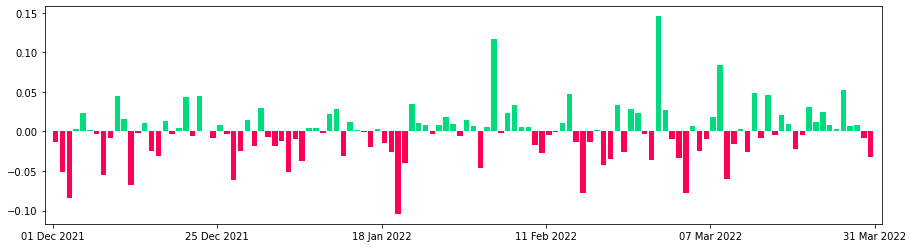

In [10]:
plot_bar(sov_df, "Percent Change", "BTC", 120)

In [11]:
def to_sequences(df: pd.DataFrame, symbol: str, seq_len: int, features: str or Sequence):
        if isinstance(features, str):
                tmp = np.array(df[features][symbol])
                tmp = np.expand_dims(tmp, axis=1)
        else:
                tmp = np.array([ df[f][symbol] for f in features ]).T
        seq = np.array([ tmp[indx: indx + seq_len] for indx in range(len(tmp) - seq_len) ])
        return seq

In [12]:
def sequence_preprocess(df: pd.DataFrame, symbol: str, seq_len: int, features: str or Sequence, train_split: float):
    assert train_split < 1, "total of split portion must be equal to 1"
    data = to_sequences(df, symbol, seq_len, features)
    n_train = int(train_split * data.shape[0])
    
    X_train = data[:n_train, :-1, :]
    y_train = data[:n_train, -1, :]
    
    X_test = data[n_train:, :-1, :]
    y_test = data[n_train:, -1, :]
    
    return X_train, y_train, X_test, y_test
    

In [13]:
SEQ_LEN = 90
train_split = 0.80
sym = "BTC"
features = ["Close"]
X_train, y_train, X_test, y_test = sequence_preprocess(sov_df, sym, SEQ_LEN, features, train_split)
print("X train:", X_train.shape, "X test", X_test.shape)
print("y train", y_train.shape, "y test", y_test.shape)

X train: (1168, 89, 1) X test (293, 89, 1)
y train (1168, 1) y test (293, 1)


In [32]:
def plot_result(index: Sequence, features: Sequence, inputs: np.array, labels=None, predict=None, max_subplot=3, split_axh=None):
    assert inputs.ndim == 3, "inputs must have 3 dimentions"
    assert len(features) == inputs.shape[-1], f"required {inputs.shape[-1]} features but got {len(features)}"
    max_n = min(inputs.shape[0], max_subplot)
    dFmt = DateFormatter("%d %b %Y")
    fig, axs = plt.subplots(max_n, inputs.shape[-1], figsize=(12,12))
    for j in range(inputs.shape[-1]):
        for i in range(max_n):
            indx = index[i:inputs.shape[1] + i + 1]
            if inputs.shape[-1] < 2: ax = axs[i]
            else: ax = axs[i, j]
            ax.set_title(f'{features[j]} [{indx[0].date()}-{index[-1].date()}]')
            if split_axh is None:
                colormat = np.where( inputs[i, :, j] > 0, "#00dc7d", "#ff0055" )
            elif split_axh == "mean":
                split_point = inputs[i, :, j].mean()
                colormat = np.where( inputs[i, :, j] > split_point, "#00dc7d", "#ff0055" )
                ax.hlines(y=split_point, xmin=indx[0], xmax=indx[-1],color='#3399ff', linewidth=1, linestyle='--', zorder=0, label=f'{split_axh}')
            elif split_axh == "moving":
                colormat = np.where( inputs[i, 1:, j] > inputs[i, 0:-1, j], "#00dc7d", "#ff0055" )
                colormat = np.hstack((["#00dc7d"], colormat))
            
            ax.bar(indx[:-1], inputs[i, :, j], color=colormat, zorder=-1, label="inputs")
            if labels is not None:
                ax.scatter(indx, np.hstack((inputs[i, :, j] ,labels[i, j])), marker=".", edgecolors='k', label="labels", c="#66b2ff", s=48)
            if predict is not None:
                ax.scatter(indx[1:], predict[i, :], marker='X',edgecolors='k', label="predict", c="y", s=48)
            ax.xaxis.set_major_formatter(dFmt)
            ax.xaxis.set_major_locator(ticker.AutoLocator())
            ax.margins(x=0.01)
            ax.legend()
    fig.tight_layout()
    plt.show()

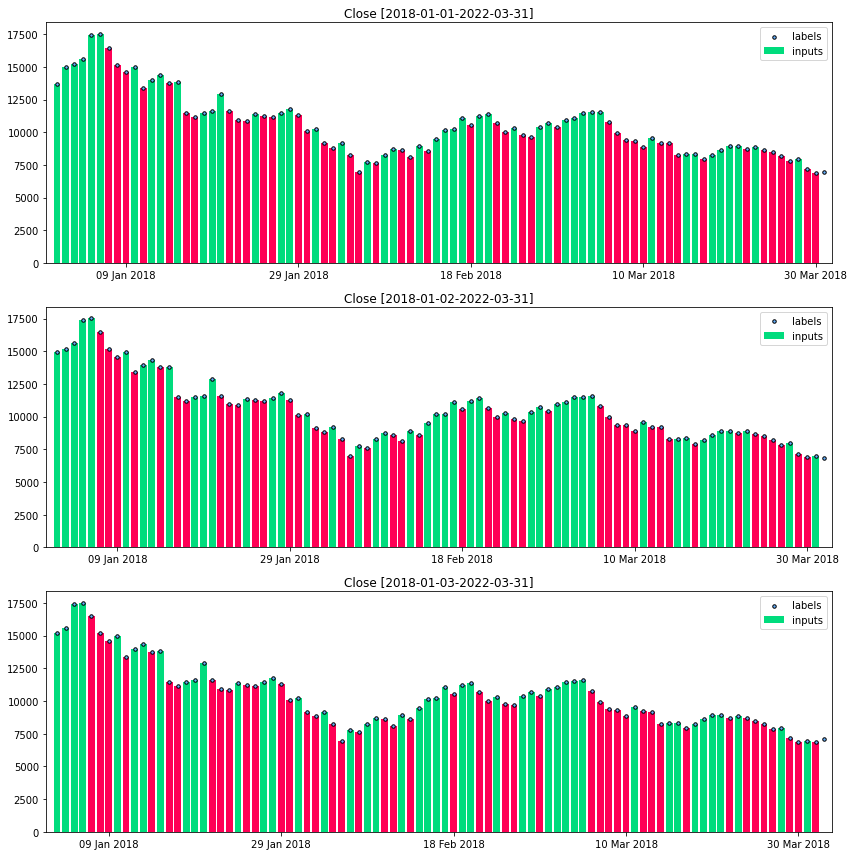

In [33]:
date_index = sov_df.index.get_level_values("Date")
plot_result(date_index, features, X_train, y_train, split_axh='moving')

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

MAX_EPOCH = 20
BATCH_SIZE = 64
WINDOW_SIZE = SEQ_LEN - 1

In [25]:
lstm_regression_model = keras.Sequential([
    layers.LSTM(WINDOW_SIZE, return_sequences=True),
    layers.Dense(units=1)
])

In [26]:
lstm_regression_model.compile(
    loss=tf.losses.MeanAbsoluteError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)

In [27]:
np.expand_dims(y_train, axis=1).shape

(1168, 1, 1)

In [28]:
history = lstm_regression_model.fit(
    X_train, np.expand_dims(y_train, axis=1), epochs=MAX_EPOCH, batch_size=BATCH_SIZE, shuffle=False,
    validation_split=0.25
)

Epoch 1/20
14/14 [==============================] - 6s 195ms/step - loss: 7550.3008 - mean_absolute_error: 7550.3008 - val_loss: 32777.2109 - val_mean_absolute_error: 32777.2109
Epoch 2/20
14/14 [==============================] - 2s 133ms/step - loss: 7549.7241 - mean_absolute_error: 7549.7246 - val_loss: 32776.8008 - val_mean_absolute_error: 32776.8047
Epoch 3/20
14/14 [==============================] - 2s 180ms/step - loss: 7549.3960 - mean_absolute_error: 7549.3955 - val_loss: 32776.4922 - val_mean_absolute_error: 32776.4922
Epoch 4/20
14/14 [==============================] - 2s 155ms/step - loss: 7549.0840 - mean_absolute_error: 7549.0850 - val_loss: 32776.1758 - val_mean_absolute_error: 32776.1758
Epoch 5/20
14/14 [==============================] - 2s 126ms/step - loss: 7548.7715 - mean_absolute_error: 7548.7725 - val_loss: 32775.8672 - val_mean_absolute_error: 32775.8672
Epoch 6/20
14/14 [==============================] - 2s 126ms/step - loss: 7548.4614 - mean_absolute_error: 754

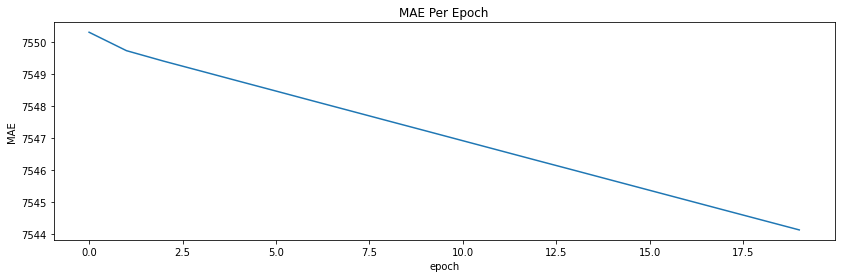

In [29]:
fig, axs = plt.subplots(1, figsize=(14,4))
axs.plot(range(MAX_EPOCH), history.history["mean_absolute_error"])
axs.set_title('MAE Per Epoch')
axs.set_xlabel('epoch')
axs.set_ylabel('MAE')

plt.show()

In [30]:
y_pred = lstm_regression_model.predict(X_test)
y_pred

array([[[5.8203526],
        [6.5908837],
        [6.708983 ],
        ...,
        [6.727807 ],
        [6.727807 ],
        [6.727807 ]],

       [[5.8203526],
        [6.5908837],
        [6.708983 ],
        ...,
        [6.727807 ],
        [6.727807 ],
        [6.727807 ]],

       [[5.8203526],
        [6.5908837],
        [6.708983 ],
        ...,
        [6.727807 ],
        [6.727807 ],
        [6.727807 ]],

       ...,

       [[5.8203526],
        [6.5908837],
        [6.708983 ],
        ...,
        [6.727807 ],
        [6.727807 ],
        [6.727807 ]],

       [[5.8203526],
        [6.5908837],
        [6.708983 ],
        ...,
        [6.727807 ],
        [6.727807 ],
        [6.727807 ]],

       [[5.8203526],
        [6.5908837],
        [6.708983 ],
        ...,
        [6.727807 ],
        [6.727807 ],
        [6.727807 ]]], dtype=float32)

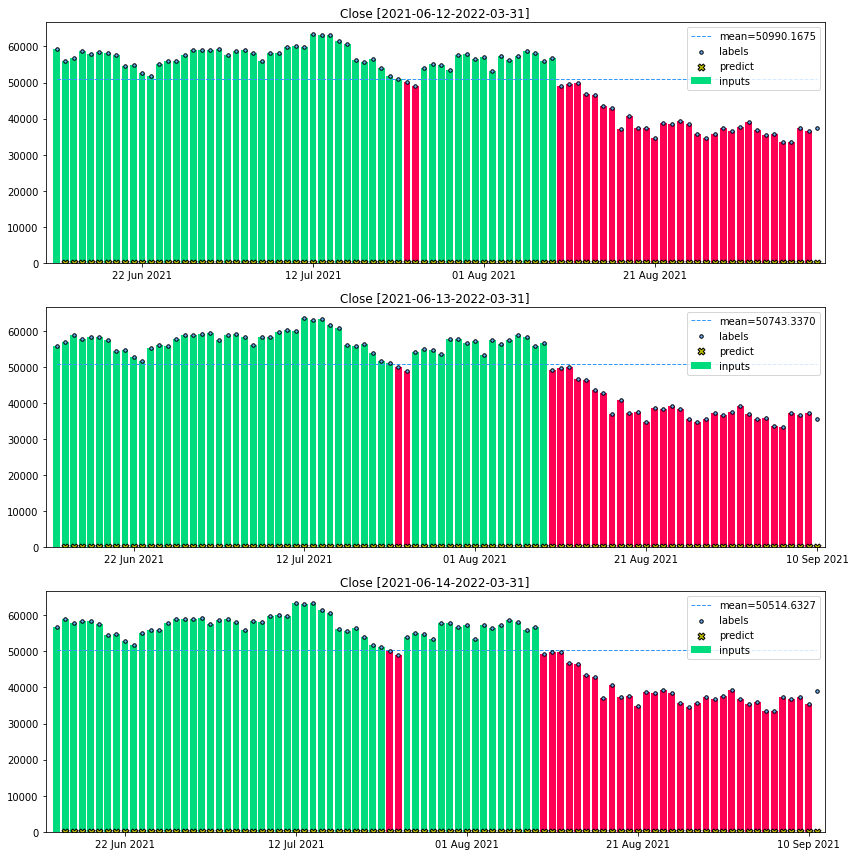

In [31]:
date_index = sov_df.index.get_level_values("Date")[-X_test.shape[0]:]
plot_result(date_index, features, X_test, y_test, y_pred, split_axh='mean')